In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/archive.zip' , 'r') as zip:
  zip.extractall()



In [ ]:
ck_dataset = pd.read_csv('/content/ckextended.csv')

In [ ]:
ck_dataset

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training
...,...,...,...
915,5,87 86 88 92 92 127 231 248 251 253 254 254 254...,PrivateTest
916,5,21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...,PrivateTest
917,5,76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...,PrivateTest
918,5,114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...,PrivateTest


In [ ]:
type(ck_dataset['pixels'][0])

str

In [ ]:
ck_dataset['emotion'].value_counts()

6    593
5     83
3     69
1     59
0     45
4     28
2     25
7     18
Name: emotion, dtype: int64

In [ ]:
emotion_labels = {
  0 : 'angry',
1 : 'disgust' ,
2 : 'fear' ,
3 : 'happy' ,
4 : 'sad' ,
5 : 'surprise' ,
6 : 'neutral' ,
7 : 'Contempt' ,
}

In [ ]:
ck_dataset["emotion_label"] = ck_dataset['emotion'].map(emotion_labels)


In [ ]:
ck_dataset["emotion_label"]

0       neutral
1       neutral
2       neutral
3       neutral
4       neutral
         ...   
915    surprise
916    surprise
917    surprise
918    surprise
919    surprise
Name: emotion_label, Length: 920, dtype: object

dataset is highly imbalanced with almost all data consists of emotion number 6




In [ ]:
from zipfile import ZipFile
with ZipFile('/content/fer 2013.zip', 'r') as zip:
  zip.extractall()


In [ ]:
from PIL import Image
import os

def get_image_desc(file_path):
    if not os.path.exists(file_path):
        print("File do not exist.")
        return None

    try:
        with Image.open(file_path) as image:
            width, height = image.size

            size = os.path.getsize(file_path)

            print("Dimensions: {} x {}".format(width, height))
            print("Size: {} bytes".format(size))

            return (width, height, size)

    except Exception as e:
        print("An error occurred:", str(e))
        return None

file_path = "/content/test/angry/PrivateTest_12846357.jpg"
get_image_desc(file_path)

Dimensions: 48 x 48
Size: 1503 bytes


(48, 48, 1503)

converting ck+dataset images into 48*48 pixel size

In [ ]:
ck_dataset['image_data'] = ck_dataset['pixels'].apply(lambda x: np.reshape(x.split(' '), (48,48)).astype(np.float32))
ck_dataset.head()

,emotion,pixels,Usage,emotion_label,image_data
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training,neutral,"[[36.0, 39.0, 35.0, 25.0, 19.0, 11.0, 8.0, 7.0..."
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training,neutral,"[[88.0, 74.0, 19.0, 4.0, 5.0, 5.0, 3.0, 12.0, ..."
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training,neutral,"[[9.0, 2.0, 4.0, 7.0, 1.0, 1.0, 1.0, 0.0, 7.0,..."
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training,neutral,"[[104.0, 106.0, 108.0, 104.0, 95.0, 50.0, 60.0..."
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training,neutral,"[[68.0, 72.0, 67.0, 67.0, 6.0, 2.0, 1.0, 1.0, ..."


In [ ]:
ck_dataset.tail(3)

,emotion,pixels,Usage,emotion_label,image_data
917,5,76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...,PrivateTest,surprise,"[[76.0, 40.0, 31.0, 38.0, 28.0, 34.0, 38.0, 36..."
918,5,114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...,PrivateTest,surprise,"[[114.0, 87.0, 16.0, 29.0, 17.0, 25.0, 30.0, 3..."
919,5,101 102 99 96 98 42 23 18 15 17 27 34 17 24 29...,PrivateTest,surprise,"[[101.0, 102.0, 99.0, 96.0, 98.0, 42.0, 23.0, ..."


In [ ]:
ck_dataset['image_data'][0]

array([[ 36.,  39.,  35., ...,  20.,  38.,  20.],
       [ 38.,  36.,  41., ...,  15.,  24.,  55.],
       [ 39.,  37.,  41., ...,   9.,  12.,  49.],
       ...,
       [219., 243., 207., ..., 218., 206., 247.],
       [229., 228., 212., ..., 229., 215., 233.],
       [254., 247., 235., ..., 193., 251., 253.]], dtype=float32)

In [ ]:
ck_dataset['image_data'][0].shape

(48, 48)

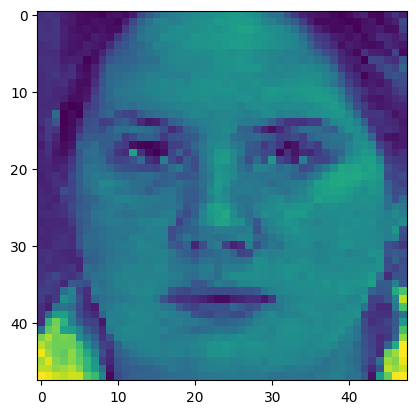

In [ ]:
plt.imshow(ck_dataset['image_data'][0])


In [ ]:
ck_dataset['image_data'][0].shape

(48, 48)

In [ ]:
ck_dataset['image_data'][0].shape

(48, 48)

In [ ]:
image = ck_dataset['image_data'][0]

num_channels = len(image.shape)

is_grayscale = (num_channels == 2) or (num_channels == 3 and image.shape[2] == 1)

if is_grayscale:
    print("The image is grayscale.")
else:
    print("The image is not grayscale.")

The image is grayscale.


In [ ]:
import numpy as np
import cv2
import os

def save_image_from_pixels(pixels, filename):


    cv2.imwrite(filename, pixels)

output_directory = "CK_FER_images"
os.makedirs(output_directory, exist_ok=True)

for index, row in ck_dataset.iterrows():
    pixels = row['image_data']
    emotion_label = (row['emotion_label'])

    directory_path = os.path.join(output_directory, emotion_label)
    os.makedirs(directory_path, exist_ok=True)

    filename = os.path.join(directory_path, f"image_{index}.jpg")

    save_image_from_pixels(pixels, filename)

In [ ]:
import shutil

def merge_directories(source_dir, destination_dir):
    # Copy files from source_dir to destination_dir
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

source_dir = '/content/train'
destination_dir = '/content/CK_FER_images'

merge_directories(source_dir, destination_dir)

In [ ]:
import shutil

def merge_directories(source_dir, destination_dir):
    # Copy files from source_dir to destination_dir
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

source_dir = '/content/test'
destination_dir = '/content/CK_FER_images'

merge_directories(source_dir, destination_dir)

In [ ]:
from keras.backend import binary_crossentropy
from numpy import mean
from numpy import ones
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import *

from tensorflow.python.keras.layers import Input, Dense
from keras import layers
from tensorflow.python.keras import Sequential
from keras.layers import Reshape,Flatten,Conv2D, Conv2DTranspose,LeakyReLU,BatchNormalization , Dropout , Concatenate , Embedding, MaxPool2D
from tensorflow.python.keras.initializers import RandomNormal
from tensorflow.python.keras import backend
from keras.optimizers import RMSprop
from tensorflow.python.keras.initializers import RandomNormal
from tensorflow.python.keras.constraints import Constraint
from keras.models import Model
from keras.layers import MaxPooling2D
from keras.optimizers import Adam


from tensorflow.keras.layers import *

def build_discriminator(num_categories=8, input_shape=(48, 48, 1)):
    input_category = Input(shape=(1,))
    num_nodes = input_shape[0] * input_shape[1]
    embedded_categories = Embedding(num_categories, 50)(input_category)
    embedded_categories = Dense(num_nodes)(embedded_categories)
    embedded_categories = Reshape((input_shape[0], input_shape[1], 1))(embedded_categories)

    input_image = Input(shape=input_shape)
    concatenated_inputs = Concatenate()([input_image, embedded_categories])

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(concatenated_inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)

    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model([input_image, input_category], output_layer)
    optimizer = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)

    return model





In [ ]:
def build_generator(latent_dim=128, num_categories=8):
    input_category = Input(shape=(1,))
    input_latent = Input(shape=(latent_dim,))

    embedded_categories = Embedding(num_categories, 50)(input_category)
    embedded_categories = Dense(12 * 12)(embedded_categories)
    embedded_categories = Reshape((12, 12, 1))(embedded_categories)

    model = Dense(128 * 12 * 12)(input_latent)
    model = LeakyReLU(alpha=0.2)(model)
    model = Reshape((12, 12, 128))(model)
    merged = Concatenate()([model, embedded_categories])
    model = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(merged)
    model = LeakyReLU(alpha=0.2)(model)
    model = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(model)
    model = LeakyReLU(alpha=0.2)(model)

    output_layer = Conv2D(1, (12, 12), activation='tanh', padding='same')(model)

    model = Model([input_latent, input_category], output_layer)

    return model


In [ ]:
def build_GAN(generator, discriminator):
    discriminator.trainable = False


    gen_latent, gen_label = generator.input
    gen_output = generator.output



    gan_output = discriminator([gen_output, gen_label])
    model = Model([gen_latent, gen_label], gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)

    return model

In [ ]:
import random
def get_random_images(dataset, n_samples):
    X, labels = dataset
    indices = np.random.randint(0, int(len(dataset[0])), int(n_samples))
    X = X[indices]
    labels = labels[indices]

    y = np.ones((n_samples, 1))
    return [X, labels], y

In [ ]:

def build_latent_points(latent_dim, n_samples , n_labels = 8):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape((n_samples, latent_dim))
    latent_labels = np.random.randint(0, n_labels, n_samples)
    return [x_input , latent_labels]

In [ ]:
def get_fake_images(generator, latent_dim , n_samples):
  x_input , fake_labels = build_latent_points(latent_dim , n_samples , n_labels = 8)
  X=  generator.predict([x_input, fake_labels])
  y= ones((n_samples ,1))
  return [X,fake_labels] , y

In [ ]:
def check_performance(current_step, generator_model, latent_dim, num_samples):
    generated_samples = get_fake_samples(generator_model, latent_dim, num_samples)
    generated_samples = (generated_samples + 1) / 2.0

    for i in range(10 * 10):
        plt.subplot(10, 10, 1 + i)
        plt.axis('off')
        plt.imshow(generated_samples[i, :, :, 0], cmap='gray_r')

    filename1 = 'generated_plot_%04d.png' % (current_step + 1)
    plt.savefig(filename1)
    plt.close()

    filename2 = 'model_%04d.h5' % (current_step + 1)
    generator_model.save(filename2)

    print('> Saved: %s and %s' % (filename1, filename2))


In [ ]:
def train(generator , discriminator , cgan_model ,dataset , latent_dim , batches=512 , sample_interval = 10):


  batch_size= len(dataset[0])/batches
  half_batch = int(batches/2.0)
  for epoch in range(100):

    for i in range(int(batch_size)):


      [fake_images ,fake_labels] , y_fake = get_fake_images(generator , latent_dim ,half_batch)

      [images ,valid_labels], y_actual = get_random_images(dataset, half_batch)
      d_loss_real = discriminator.train_on_batch([images , valid_labels], y_actual)
      d_loss_fake = discriminator.train_on_batch([fake_images , fake_labels] , y_fake)

      [latent_vector , labels] = build_latent_points(latent_dim , batches)
      labels_gan = np.ones((batches ,1))


      g_loss = cgan_model.train_on_batch([latent_vector,labels], labels_gan)

      print(epoch, d_loss_real , d_loss_fake, g_loss)
      if epoch % sample_interval == 0:
        generator.save('model_latest_epoch{}.h5'.format(epoch))

  generator.save('cgan_generator.h5')




In [ ]:
import os
from PIL import Image
import os
import numpy as np
from PIL import Image
emotion_labels = {
  'angry' : 0,
'disgust': 1 ,
'fear' : 2,
'happy': 3 ,
'sad' : 4 ,
'surprise': 5 ,
'neutral' : 6 ,
'Contempt' : 7 ,
}

def load_images_from_directory(dir_name):
    X = []
    y = []

    for folder_name in os.listdir(dir_name):
        folder_path = os.path.join(dir_name, folder_name)
        if not os.path.isdir(folder_path):
            continue
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            if not os.path.isfile(file_path):
                continue

            try:
                img = Image.open(file_path)
                img = np.array(img)
                img = np.expand_dims(img, axis=-1)  # Reshape image to (48, 48, 1)
                X.append(img)
                y.append(folder_name)
                img.close()

            except Exception as e:
                print(f"Error loading image: {file_path} - {e}")
    encoded_labels = np.array([emotion_labels[label] for label in y])

    return np.array(X), encoded_labels


In [ ]:
emotion_labels = {
  'angry' : 0,
'disgust': 1 ,
'fear' : 2,
'happy': 3 ,
'sad' : 4 ,
'surprise': 5 ,
'neutral' : 6 ,
'Contempt' : 7 ,
}

def load_images_from_directory1(dir_name, samples_per_label=1000):
    X = []
    y = []

    label_counts = {}

    for folder_name in os.listdir(dir_name):
        folder_path = os.path.join(dir_name, folder_name)
        if not os.path.isdir(folder_path):
            continue

        label_counts[folder_name] = 0

        file_list = os.listdir(folder_path)
        random.shuffle(file_list)

        for file_name in file_list:
            file_path = os.path.join(folder_path, file_name)

            if not os.path.isfile(file_path):
                continue

            try:
                img = Image.open(file_path)
                img = np.array(img)
                img = np.expand_dims(img, axis=-1)  # Reshape image to (48, 48, 1)
                X.append(img)
                y.append(folder_name)
                img.close()

                label_counts[folder_name] += 1

                if label_counts[folder_name] == samples_per_label:
                    break

            except Exception as e:
                print(f"Error loading image: {file_path} - {e}")

        if all(count == samples_per_label for count in label_counts.values()):
            break

    encoded_labels = np.array([emotion_labels[label] for label in y])

    return np.array(X), encoded_labels



In [ ]:
def load_images_from_directory2(dir_name, samples_per_label=100):
    X = []
    y = []

    label_counts = {}

    for folder_name in os.listdir(dir_name):
        folder_path = os.path.join(dir_name, folder_name)
        if not os.path.isdir(folder_path):
            continue

        label_counts[folder_name] = 0

        file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file_name))]

        selected_file_paths = random.sample(file_paths, min(len(file_paths), samples_per_label))

        for file_path in selected_file_paths:
            try:
                img = Image.open(file_path)
                img = np.array(img)
                img = np.expand_dims(img, axis=-1)  # Reshape image to (48, 48, 1)
                X.append(img)
                y.append(folder_name)
                img.close()

                label_counts[folder_name] += 1

            except Exception as e:
                print(f"Error loading image: {file_path} - {e}")

    encoded_labels = np.array([emotion_labels[label] for label in y])

    return np.array(X), encoded_labels



In [ ]:
import os
import matplotlib.pyplot as plt


def save_images1(generator, epoch, latent_dim):
    latent_points, labels = build_latent_points(100 , 128)

    gen_images = generator.predict([latent_points, labels])

    print('************************')
    gen_images = 0.5 * gen_images + 0.5

    output_dir = 'new_images_latest/'
    os.makedirs(output_dir, exist_ok=True)

    emotion_dict = {
  0 : 'angry',
1 : 'disgust' ,
2 : 'fear' ,
3 : 'happy' ,
4 : 'sad' ,
5 : 'surprise' ,
6 : 'neutral' ,
7 : 'Contempt' ,
}


    for i , emotion in enumerate(labels):
        emotion = emotion_dict.get(emotion)
        label_dir = os.path.join(output_dir, emotion)
        os.makedirs(label_dir, exist_ok=True)

        gen_image = gen_images[i, :, :, 0]


        file_path = os.path.join(label_dir, f'CK+FER_{epoch}_image{i}.png')
        plt.imsave(file_path, gen_image, cmap='gray')


In [ ]:
from keras.models import load_model

gen_model = load_model('/content/cgan_trained.h5')


In [ ]:
generated_images_list = []
import os
def generate_and_save_images(cgan_model, num_images_per_emotion=5, output_directory='generated_images_new1'):

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for label, emotion in emotion_dict.items():

        print(label)
        emotion_directory = os.path.join(output_directory, emotion)
        if not os.path.exists(emotion_directory):
            os.makedirs(emotion_directory)

        cnt = 0
        for i in range(num_images_per_emotion):
            noise = randn(noise_dim * 1)
            noise = noise.reshape(1, noise_dim)
            label_one_hot = np.asarray([label])
            generated_image = cgan_model.predict([noise, label_one_hot])
            generated_image = (generated_image + 1) / 2.0
            generated_images_list.append({emotion: generated_image})

    return generated_images_list


noise_dim = 100


generate_and_save_images(gen_model, num_images_per_emotion=250, output_directory='generated_images_1')





0
1/1 [==============================] - 0s 111ms/step
1
1/1 [==============================] - 0s 74ms/step
2
1/1 [==============================] - 0s 61ms/step
3
1/1 [==============================] - 0s 57ms/step
4
1/1 [==============================] - 0s 64ms/step
5
1/1 [==============================] - 0s 72ms/step
6
1/1 [==============================] - 0s 60ms/step


[{'angry': array([[[[0.9708028 ],
           [0.981001  ],
           [0.9914429 ],
           ...,
           [0.9580631 ],
           [0.96761644],
           [0.9876734 ]],
  
          [[0.9878409 ],
           [0.99147654],
           [0.99515915],
           ...,
           [0.9611747 ],
           [0.97852254],
           [0.9881732 ]],
  
          [[0.9922192 ],
           [0.99592566],
           [0.99701655],
           ...,
           [0.97051185],
           [0.97386265],
           [0.9889632 ]],
  
          ...,
  
          [[0.96055496],
           [0.97461796],
           [0.99423504],
           ...,
           [0.19652417],
           [0.19973323],
           [0.2369642 ]],
  
          [[0.9663194 ],
           [0.97481346],
           [0.99014634],
           ...,
           [0.20924407],
           [0.23572949],
           [0.22087973]],
  
          [[0.9694098 ],
           [0.9787219 ],
           [0.98529893],
           ...,
           [0.24326217],
       

In [ ]:
flattened_data = []

for data_dict in generated_images_list:
    for emotion, image_array in data_dict.items():
        flat_image_array = np.array(image_array).flatten()
        flattened_data.append({'emotion': emotion, 'value': flat_image_array})

df = pd.DataFrame(flattened_data)

print(df)

      emotion                                              value
0       angry  [0.9708028, 0.981001, 0.9914429, 0.99422187, 0...
1       angry  [0.30533534, 0.26315984, 0.22701547, 0.2131307...
2       angry  [0.19117299, 0.11893797, 0.17498896, 0.1320258...
3       angry  [0.084973514, 0.043287367, 0.056509048, 0.0669...
4       angry  [0.7000407, 0.7042651, 0.7341934, 0.7578294, 0...
...       ...                                                ...
1745  neutral  [0.9542881, 0.94816816, 0.92889726, 0.7546035,...
1746  neutral  [0.31250238, 0.2716028, 0.24059105, 0.26038557...
1747  neutral  [0.09066996, 0.05737558, 0.06977019, 0.1224876...
1748  neutral  [0.73436904, 0.74425596, 0.74926376, 0.7101466...
1749  neutral  [0.29827726, 0.24091643, 0.26552898, 0.3127334...

[1750 rows x 2 columns]


In [ ]:
from PIL import Image

output_directory = 'output_imagesf'

for index, row in df.iterrows():
    emotion = row['emotion']
    value = row['value']

    image_2d = value.reshape((48, 48)).astype(np.float32)

    image_2d = (image_2d * 255).astype(np.uint8)

    pil_image = Image.fromarray(image_2d, 'L')

    emotion_directory = os.path.join(output_directory, emotion)
    os.makedirs(emotion_directory, exist_ok=True)

    image_filename = f'{emotion}_{index}.png'
    output_path = os.path.join(emotion_directory, image_filename)
    pil_image.save(output_path)

In [ ]:
from google.colab import files
files.download('/content/output_imagesf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/sample_data.zip /content/output_imagesf

  adding: content/output_imagesf/ (stored 0%)
  adding: content/output_imagesf/sad/ (stored 0%)
  adding: content/output_imagesf/sad/sad_1245.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1039.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1116.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1223.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1096.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1043.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1020.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1196.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1192.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1073.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1137.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1134.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1201.png (stored 0%)
  adding: content/output_imagesf/sad/sad_1163.png (stored 0%)
  adding: content/output_imagesf/sad

In [ ]:
import cv2

image_path = 'input_image.jpg'
image = cv2.imread(image_path)

filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

cv2.imshow('Original Image', image)
cv2.imshow('Filtered Image', filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2


In [ ]:
gen_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 18432)        1861632     ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        350         ['input_3[0][0]']                
                                                                                       

In [ ]:
#latent_dim = 100
n_labels = 8
discriminator = build_discriminator()
generator = build_generator(n_labels = n_labels ,latent_dim = 100)
cgan_model = build_GAN(generator ,discriminator)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
dataset = load_images_from_directory2('/content/CK_FER_images')


Error loading image: /content/CK_FER_images/fear/Training_44458548.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/Training_3635531.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/Training_1914289.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/Training_34156894.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/Training_7452734.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/Training_78276840.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/PublicTest_94232097.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/CK_FER_images/fear/PrivateTest_16750126.jpg - 'numpy.ndarray' object has no attribute 'close'
Error loading image: /content/

In [ ]:
dataset[0].shape

(718, 48, 48, 1)

In [ ]:
train(generator , discriminator , cgan_model ,dataset , latent_dim =100 , sample_interval = 10)

8/8 [==============================] - 5s 626ms/step


0 7.773820877075195 0.69123375415802 0.6896336674690247
8/8 [==============================] - 5s 674ms/step
1 0.0004727194900624454 0.6860711574554443 0.6845564842224121
8/8 [==============================] - 4s 545ms/step
2 0.00027069845236837864 0.6800817251205444 0.6786220073699951
8/8 [==============================] - 4s 543ms/step
3 2.4006005787668983e-06 0.6730523109436035 0.6713308095932007
8/8 [==============================] - 5s 661ms/step
4 0.003922110423445702 0.6642446517944336 0.6622283458709717
8/8 [==============================] - 5s 639ms/step
5 6.3346692513732705e-06 0.6518815755844116 0.6502548456192017
8/8 [==============================] - 4s 548ms/step
6 0.00027213149587623775 0.6364914774894714 0.6349910497665405
8/8 [==============================] - 4s 553ms/step
7 4.389896275824867e-06 0.6176866888999939 0.6152331829071045
8/8 [==============================] - 5s 631ms/step
8 2.0052941636095056e-06 0.5955032110214233 0.5934572219848633
8/8 [===============

10 2.9802646167809144e-05 0.564156711101532 0.558836817741394
8/8 [==============================] - 4s 548ms/step
11 0.003986562602221966 0.5510022640228271 0.5482420921325684
8/8 [==============================] - 4s 550ms/step
12 1.0707588444347493e-05 0.5428726077079773 0.539941132068634
8/8 [==============================] - 5s 566ms/step
13 1.7781127326088608e-07 0.53580641746521 0.5311896800994873
8/8 [==============================] - 5s 643ms/step
14 0.00010396796278655529 0.5289293527603149 0.5268937349319458
8/8 [==============================] - 4s 550ms/step
15 0.0006086219218559563 0.5216566920280457 0.5161628723144531
8/8 [==============================] - 4s 547ms/step
16 1.2851788255829888e-07 0.5150261521339417 0.5112547874450684
8/8 [==============================] - 4s 544ms/step
17 3.028217179235071e-07 0.5079936981201172 0.5022128820419312
8/8 [==============================] - 5s 559ms/step
18 9.281706514485677e-10 0.5008637309074402 0.4928215742111206
8/8 [=====

20 6.711547939630691e-07 0.4821928143501282 0.4768427610397339
8/8 [==============================] - 5s 646ms/step
21 3.5165508052159566e-06 0.47421151399612427 0.4666510820388794
8/8 [==============================] - 5s 594ms/step
22 1.1107076369754054e-09 0.4638373851776123 0.4579714238643646
8/8 [==============================] - 4s 556ms/step
23 2.6464723745789343e-09 0.4543573260307312 0.4457593560218811
8/8 [==============================] - 4s 552ms/step
24 4.189493196804506e-09 0.44339868426322937 0.43643832206726074
8/8 [==============================] - 4s 548ms/step
25 1.3855285842245824e-11 0.4315263032913208 0.42620939016342163
8/8 [==============================] - 4s 546ms/step
26 5.3012740031110894e-11 0.424701988697052 0.41593313217163086
8/8 [==============================] - 5s 571ms/step
27 2.142784616410154e-09 0.4094710946083069 0.40381914377212524
8/8 [==============================] - 5s 651ms/step
28 1.8213632997778973e-15 0.39847707748413086 0.39098662137985

30 7.458123701953312e-11 0.36992406845092773 0.3608285188674927
8/8 [==============================] - 4s 548ms/step
31 2.5318638787082126e-13 0.35685598850250244 0.34790271520614624
8/8 [==============================] - 4s 546ms/step
32 1.2791516856616957e-17 0.34234920144081116 0.33236265182495117
8/8 [==============================] - 5s 620ms/step
33 5.878378838385101e-14 0.32709619402885437 0.3161546289920807
8/8 [==============================] - 5s 650ms/step
34 2.8418670194874096e-11 0.31193676590919495 0.2999938130378723
8/8 [==============================] - 4s 538ms/step
35 7.346612366035139e-15 0.2951517701148987 0.28186196088790894
8/8 [==============================] - 4s 540ms/step
36 4.872377365451316e-17 0.2780482769012451 0.2640131413936615
8/8 [==============================] - 4s 539ms/step
37 3.197308873121884e-18 0.2584567368030548 0.2477065920829773
8/8 [==============================] - 5s 644ms/step
38 7.248565967898145e-24 0.24291428923606873 0.23071816563606

40 8.937608396507425e-27 0.2077038735151291 0.19835036993026733
8/8 [==============================] - 5s 597ms/step
41 5.243972373773003e-17 0.192122220993042 0.1828049272298813
8/8 [==============================] - 4s 543ms/step
42 3.727184136739818e-30 0.17680859565734863 0.1639833003282547
8/8 [==============================] - 4s 558ms/step
43 4.23085713499371e-31 0.16112609207630157 0.15148870646953583
8/8 [==============================] - 4s 541ms/step
44 1.3877817429185808e-34 0.14780548214912415 0.13856905698776245
8/8 [==============================] - 4s 550ms/step
45 1.0807604713077789e-26 0.1323670744895935 0.12567737698554993
8/8 [==============================] - 4s 550ms/step
46 1.2931681532068333e-31 0.1210760623216629 0.1129520982503891
8/8 [==============================] - 4s 551ms/step
47 1.1339040382590503e-32 0.11066939681768417 0.10291310399770737
8/8 [==============================] - 4s 542ms/step
48 1.967275203112525e-33 0.09890183806419373 0.09250500798225

50 1.2594678101541931e-33 0.08308880031108856 0.07785779237747192
8/8 [==============================] - 5s 623ms/step
51 7.07833409129309e-38 0.07599970698356628 0.06918926537036896
8/8 [==============================] - 5s 630ms/step
52 1.5761293933045757e-36 0.06791806221008301 0.06432662159204483
8/8 [==============================] - 5s 585ms/step
53 0.0 0.05978352203965187 0.05723296478390694
8/8 [==============================] - 5s 566ms/step
54 0.0 0.056178055703639984 0.05343750864267349
8/8 [==============================] - 4s 559ms/step
55 0.0 0.0514109805226326 0.047733135521411896
8/8 [==============================] - 4s 560ms/step
56 0.0 0.04756402224302292 0.0447632372379303
8/8 [==============================] - 4s 543ms/step
57 0.0 0.042686827480793 0.04035516828298569
8/8 [==============================] - 4s 551ms/step
58 0.0 0.0402725413441658 0.037030063569545746
8/8 [==============================] - 4s 548ms/step
59 0.0 0.03678245097398758 0.034715428948402405

60 0.0 0.033176276832818985 0.032576993107795715
8/8 [==============================] - 4s 540ms/step
61 0.0 0.03082885593175888 0.029707971960306168
8/8 [==============================] - 4s 544ms/step
62 0.0 0.029162965714931488 0.027423573657870293
8/8 [==============================] - 5s 622ms/step
63 0.0 0.027404524385929108 0.025943096727132797
8/8 [==============================] - 5s 619ms/step
64 0.0 0.025128882378339767 0.024537913501262665
8/8 [==============================] - 5s 619ms/step
65 0.0 0.023981332778930664 0.022390540689229965
8/8 [==============================] - 5s 591ms/step
66 0.0 0.021916463971138 0.02126377448439598
8/8 [==============================] - 5s 573ms/step
67 0.0 0.02089708112180233 0.019903846085071564
8/8 [==============================] - 5s 545ms/step
68 0.0 0.01961989887058735 0.01897677779197693
8/8 [==============================] - 4s 540ms/step
69 0.0 0.018253445625305176 0.0175999216735363
8/8 [==============================] - 4s 5

70 0.0 0.017057619988918304 0.016398577019572258
8/8 [==============================] - 4s 546ms/step
71 0.0 0.016441110521554947 0.01549816969782114
8/8 [==============================] - 4s 539ms/step
72 0.0 0.01520407572388649 0.014629459008574486
8/8 [==============================] - 5s 588ms/step
73 0.0 0.01422462984919548 0.013963407836854458
8/8 [==============================] - 5s 618ms/step
74 0.0 0.013839161954820156 0.01343688927590847
8/8 [==============================] - 5s 623ms/step
75 0.0 0.013315925374627113 0.012575080618262291
8/8 [==============================] - 5s 573ms/step
76 0.0 0.012675759382545948 0.011757882311940193
8/8 [==============================] - 5s 546ms/step
77 0.0 0.011818461120128632 0.01129584014415741
8/8 [==============================] - 4s 544ms/step
78 0.0 0.011409442871809006 0.010780468583106995
8/8 [==============================] - 4s 550ms/step
79 0.0 0.010596327483654022 0.01037626713514328
8/8 [==============================] - 

80 0.0 0.010160237550735474 0.00988741498440504
8/8 [==============================] - 4s 556ms/step
81 0.0 0.00968405045568943 0.009534305892884731
8/8 [==============================] - 5s 619ms/step
82 0.0 0.009278995916247368 0.009130945429205894
8/8 [==============================] - 5s 619ms/step
83 0.0 0.009157098829746246 0.008802996948361397
8/8 [==============================] - 5s 618ms/step
84 0.0 0.008444609120488167 0.008440429344773293
8/8 [==============================] - 4s 553ms/step
85 0.0 0.008249284699559212 0.0080474354326725
8/8 [==============================] - 4s 546ms/step
86 0.0 0.007779143750667572 0.007508328650146723
8/8 [==============================] - 4s 545ms/step
87 0.0 0.007592478301376104 0.007381713017821312
8/8 [==============================] - 4s 546ms/step
88 0.0 0.007173549849539995 0.006924159359186888
8/8 [==============================] - 4s 548ms/step
89 0.0 0.007013724185526371 0.006873049773275852
8/8 [==============================] 

90 0.0 0.006823493167757988 0.006386098451912403
8/8 [==============================] - 5s 618ms/step
91 0.0 0.006334390956908464 0.0062451232224702835
8/8 [==============================] - 5s 623ms/step
92 0.0 0.00621352344751358 0.006004100665450096
8/8 [==============================] - 5s 588ms/step
93 0.0 0.005968120414763689 0.0057671405375003815
8/8 [==============================] - 4s 551ms/step
94 0.0 0.005918348208069801 0.00553319463506341
8/8 [==============================] - 4s 547ms/step
95 0.0 0.005613567307591438 0.005587392952293158
8/8 [==============================] - 4s 543ms/step
96 0.0 0.005421885289251804 0.005210955627262592
8/8 [==============================] - 4s 558ms/step
97 0.0 0.005197737365961075 0.005057882517576218
8/8 [==============================] - 4s 549ms/step
98 0.0 0.004965810105204582 0.004834662191569805
8/8 [==============================] - 5s 611ms/step


99 0.0 0.004771142266690731 0.004941741470247507


In [ ]:
import pickle
with open('/content/gen_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 18432)        1861632     ['input_8[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        400         ['input_7[0][0]']                
                                                                                            

In [ ]:
import pickle
.

model_path = 'gen_model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(gen_model, file)

In [ ]:
gen_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 18432)        1861632     ['input_8[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 50)        400         ['input_7[0][0]']                
                                                                                            